<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center><b>Bachelor of Ecole Polytechnique</b></center>
<center>Computational Mathematics, year 1, semester 2</center>
<center>Author: Aline Lefebvre-Lepot</center>

# EXAM (MAA106 2019-2020)

<br>
<br>
<br>
<center><b>Due date: 2022.06.10</b></center>
<center><b>Name: Yubo Cai</b></center>
<br>
<br>
<br>


<div markdown=1 class=Abstract> 

**This subject is about acceleration of convergence and consists of 3 sections:**

- Section 1: Initial algorithm
- Section 2: Relaxed algorithm
- Section 3: Approximated relaxed algorithm



<div markdown=1 class=Abstract> 

**Instructions:**

- Justify (even with a few words) your answers
- Please provide your answers in the "Answer" cells already created
- Upload your notebook to the designated area on moodle after you have finished


**Reminder: If the notebook does not have the usual aspect, for instance if you do not have cells of different colors, click on the "not trusted" button in the top right corner.**

In [1]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)

A function $g$ being given, we consider the problem of finding $x^*$ solution to 

$$
g(x^*)=x^*.
$$

## A first algorithm

We provide below the code of an algorithm. Given a function $g$, a real $x_0$, a real $\epsilon$ and an integer $K$, it computes a sequence $(x_k)_k$:

In [2]:
## input : g = function
##         x0 = real
##         eps = real
##         K = integer
## output : kend = the number of iteration achieved
##          x = array [x0, ... , xkend]
def Algo(g,x0,eps,K):
    x = np.zeros(K+1)
    x[0] = x0 
    x[1] = g(x0)
    k = 1
    while abs(x[k]-x[k-1])>eps and k < K:
        x[k+1] = g(x[k])
        k = k+1
    return (k, x[:k+1])

<div  markdown=1 class="DoIt"> Answer the following questions:

- How is $x_{k+1}$ computed from $x_k$?
- When does the algorithm stop?
- If the sequence $x_k$ converges to a real $x^*$, and the function $g$ is continuous, which equation is verified by the limit $x^*$?
- How is called this algorithm?

<div  markdown=1 class="Answer"> 

1. The relationship between $x_k$ and $x_{k+1}$ is given by the following equation: $x_{k+1} = g(x_{k})$

2. The algorithm stops when the stop citerition does not meet, which means the difference between two successive values of $x_k$ is smaller than $\epsilon$ or when $k$ is greater than $K$.

3. if the sequence $x_k$ converges to a real $x^*$, and the function $g$ is continuous, then the limit $x^*$ is verified by the equation: $g(x^*) = x^*$.

4. The algorithm is called "fixed point method".

We recall the following result about this algorithm:

<div  markdown=1 class="Thm">

**Convergence of the algorithm.**

Let $g: [a,b]\to \mathbb{R}$ and $x_0$ be given. Consider the sequence $(x_{k})_k$ for $k\geq 0$, generated by the algorithm. Suppose

- $g: [a,b] \to [a,b]\quad$ (i.e. $[a,b]$ is stable for $g$)
- $g\in {\cal C}^1 ([a,b])$ and
$$
\exists K<1 \quad\ \text{such that} \quad\ \forall x\in[a,b], \quad|g'(x)|\leq K
$$

Then,  the sequence $(x_k)_k$ converges to the same limit $x^*$ for any choice of $x_0\in [a,b]$. Moreover we have

$$
\lim_{k\to\infty} \frac{x_{k+1}-x^*}{x_k-x^*} = g'(x^*)
$$

so that the sequence converges at least with order 1.

<div  markdown=1 class="DoIt">

We consider the function $g:[1,2]\to\mathbb{R}$, defined by:

$$\displaystyle g(x) = -\frac{1}{20} (x^3-2) + x \qquad\forall~x\in[1,2].$$ 

- Compute $g'$
- Prove that $g$ is an increasing function
- Prove that $g([1,2])\subset [1,2]$


<div  markdown=1 class="Answer"> 

1. $g'(x) = -\frac{3}{20}x^{2}+1$

2. $g(x)$ is increasing since we have the $g'(x) = -\frac{3}{20}x^{2}+1$ and for all $x \in [1,2]$. Since for all $x \in [1,2]$, $g'(x)$ is positive, we have $g(x)$ is increasing for all $x \in [1,2]$.

3. Since we know $g$ is increasing, therefore we have $g([1,2]) = [\frac{21}{20},\frac{17}{10}] \subset [1,2]$

<div  markdown=1 class="DoIt">

We want to apply the algorithm to the function $g$. To do so, we choose $x_0\in [1,2]$.

- Using the previous theorem, prove that the sequence generated by the algorithm converges to a real $x^*$ with order at least 1.
- What is the value of $x^*$?

<div  markdown=1 class="Answer"> 

1. Since we have $[1:2]$ is stable for g and $g \in C^{1}([a,b])$ and we know that $g'(x)$ is decreasing for all $x \in [1,2]$, therefore we have $g'(x) \leq 17/20 \leq 1$ for all $x \in [1,2]$. Then by the theorem we know that the sequence generated by the algorithm converges to a real $x^*$ with order at least 1.

2. we have $g(x)=-\frac{1}{20} (x^3-2) + x=x$, then we solve that $x^*=2^{\frac{1}{3}}$.

<div  markdown=1 class="DoIt">

Run the following cell to compute the first terms of the sequence for the function $g$.

In [5]:
# solution
xstar = 2**(1/3)
print('xstar =',xstar)

# definition of function g
def g(x):
    return - (x**3-2)/20 + x

# parameters
x0 = 1.5
eps = 1e-4
K = 30

# run the algorithm
k, x = Algo(g,x0,eps,K)

# print number of terms computed
print('k = ',k)
# print the last approximation computed
print('x =',x[k])
# print the last test performed in the loop
FinalTest = abs(x[k]-x[k-1])
print('Last test =',FinalTest)
# print the error for the last approximation
err = abs(x[k]-xstar)
print('Last error =',err)

xstar = 1.2599210498948732
k =  24
x = 1.260198298526237
Last test = 8.668017933266547e-05
Last error = 0.0002772486313638023


<div  markdown=1 class="DoIt">

In the previous test: 
- Compare the number of terms computed with $K$.
- Compare the value of $\epsilon$ with the last test in the loop.
- Why did the algorithm stop? 
- Compare the value of the error with the last test.
- Compare the value of the error with $\epsilon$.

In view of this test, 
- Does the stopping criterion $|x_k-x_{k-1}|<\epsilon$ ensure that the precision of the last approximation is smaller than $\epsilon$?
- Is $|x_k-x_{k-1}|$ an "error estimator" for this algorithm? Why?

<div  markdown=1 class="Answer"> 

1. Since $k=24$ and $K=30$, therefore we have $k_{last}<K$ and the algorithms stopped before $K$

2. We have last test = $|x_k-x_{k-1}|<\epsilon$.

3. Since we have $|x_k-x_{k-1}|<\epsilon$ before the k reach the number K so the algorithms stop.

4. We can find that last error is bigger than last test.

5. We can find that the value of last error is bigger that $\epsilon$

6. Not neccessary, since we can find in this example that the value of last error is bigger than $\epsilon$ when we have the stopping criterion $|x_k-x_{k-1}|<\epsilon$

7. No, since in the theorem of erro estimator we must have error estimator is the uppor bound of the error, which means that the error estimator is bigger that $|x_{k}-x^*|$ which we not find in this example.

<div  markdown=1 class="DoIt">

Complete the following cell to plot the error versus $k$ for the previous test.

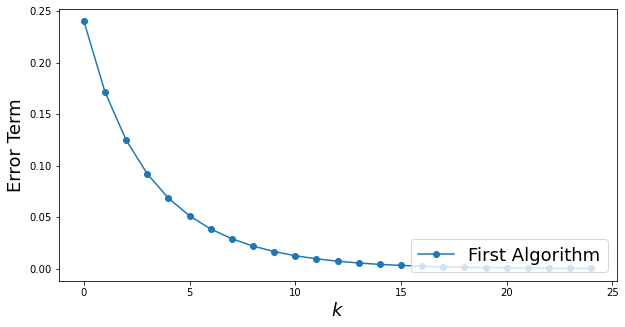

In [8]:
# solution
xstar = 2**(1/3)

# parameters
x0 = 1.5
eps = 1e-4
K = 30

# run the algorithm
k, x = Algo(g,x0,eps,K)

## vector e_{k} = |x_k-x^*|
err = np.abs(x-xstar)

## plot e_{k} versus k
tabk = np.arange(0,k+1)
fig = plt.figure(figsize=(10, 5))
plt.plot(tabk,err, 'o-', label='First Algorithm') #plot
plt.legend(loc='lower right', fontsize=18)
plt.xlabel('$k$', fontsize=18)
plt.ylabel('Error Term', fontsize=18)
plt.show()

<div  markdown=1 class="DoIt">

Complete the following cell to estimate the order of convergence of the algorithm. Use a figure together with the command polyfit to estimate the order of convergence.

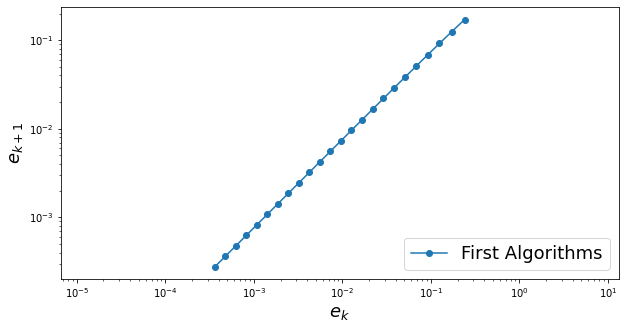

approximated order of convergence =  0.9934927464737535


In [12]:
# solution
xstar = 2**(1/3)
x0 = 1.5
eps = 1e-4
K = 30
k, x = Algo(g,x0,eps,K)

## vector e_{k} = |x_k-x^*|
err = np.abs(x-xstar)

## vectors e_{k} and  e_{k+1}
X = err[:-1]     # X[k]=e_{k},   k=0...kend-1
Y = err[1:]     # Y[k]=e_{k+1}, k=0...kend-1

## plot e_{k+1} versus e_{k} in loglog-scale
fig = plt.figure(figsize=(10, 5))
plt.loglog(X, Y, marker='o', label='First Algorithms') #plot, log-log scale
plt.legend(loc='lower right', fontsize=18)
plt.axis('equal')
plt.xlabel('$e_{k}$', fontsize=18)
plt.ylabel('$e_{k+1}$', fontsize=18)
plt.show()

## estimate the slope of the line using polyfit
slope = np.polyfit(np.log(X), np.log(Y), 1)[0]
print("approximated order of convergence = ", slope)

<div  markdown=1 class="DoIt">

Does this test confirm the expected order of convergence?

<div  markdown=1 class="Answer"> 

Yes, since we can find that the order of convergence in this test is 0.99 which is really close to 1, therefore we can say that the order of convergence is 1 and the test comfirm the expected order of convergence.

## Relaxation method

We recall the following result, showing that, for "good" functions $g$, the previous algorithm converges with a better than linear speed of convergence:

<div  markdown=1 class="Thm">

**"Better than linear" speed of convergence.**

Let $g: [a,b]\to \mathbb{R}$ and suppose that the hypotheses of the previous theorem are fulfilled. If 

- $g\in {\cal C^{p+1}} ( I )$ where $I$ is a neighbourhood of $x^*$ and $p$ is an integer $p\geq 0$
- $g^{(i)}(x^*)=0\quad$ for $\quad 0\leq i \leq p$
- $g^{(p+1)}(x^*)\neq 0$ 

Then, the algorithm applied to the function $g$ satifies 

$$
\lim_{k\to\infty} \frac{x_{k+1}-x^*}{(\,x_k-x^*\,)\,^{p+1}} = \frac{g^{(p+1)}(x^*)}{(p+1)!}.
$$

This proves that the sequence converges at least with order $p+1$.

The relaxation method tries to take advantage of this result, by modifying the function in order to make the algorithm converge quicker.

For any $\alpha\neq -1$, consider the following function:

$$g_\alpha(x) = \frac{g(x)+\alpha x}{\alpha +1}$$


<div  markdown=1 class="DoIt">

- Prove that $g(x^*)=x^*$ is equivalent to $g_\alpha(x^*)=x^*$
- Compute the derivative of $g_\alpha$

<div  markdown=1 class="Answer"> 

1. First we assume we have $g(x^*)=x^*$ and we want to prove that $g_\alpha(x^*)=x^*$. Then we have $g_\alpha(x)=\frac{g(x)+\alpha x}{\alpha +1}=\frac{x+\alpha x}{\alpha +1}=\frac{(1+\alpha)x }{\alpha +1}=x$. Then we have $g_\alpha(x^*)=x^*$ in order to prove $g(x^*)=x^*$, Since $g_\alpha(x) = \frac{g(x)+\alpha x}{\alpha +1}=x$, we have $g(x)+\alpha x = (\alpha+1)x$, therefore we have $g(x^*)=x^*$. Then we finish the prove.

2. $g'_{\alpha}(x) = \frac{g'(x)+\alpha}{\alpha+1}$

We choose to approximate $x^*$ solution to $g(x^*)=x^*$ by applying the algorithm studied in the previous section to 

$$g_\alpha\quad \text{ for } \quad \alpha = -g'(x^*).$$

<div  markdown=1 class="DoIt"> Explain this choice.


<div  markdown=1 class="Answer"> 

Since we have from the previous question that we have $g'(x^*)=0$, therefore the algorithm will converge at least in order 2

This method is called a relaxation method. The corresponding iterations for a given function $g$ are:

$$
x_{k+1} = g_\alpha (x_k) = \frac{g(x_k)+\alpha x_k}{\alpha +1}
$$

The real $\alpha$ is called the relaxation parameter.

<div  markdown=1 class="DoIt"> Complete the function below to implement this new algorithm. Use the same stopping criterion as in the previous section.


In [13]:
## input : g = function
##         alpha = relaxation parameter
##         x0 = real
##         eps = real
##         K = integer
## output : kend = the number of iteration achieved
##          x = array [x0, ... , xkend]
def RelaxedAlgo(g,alpha,x0,eps,K):
    x = np.zeros(K+1)
    x[0] = x0 
    x[1] = (g(x0)+alpha*x0)/(1+alpha)
    k = 1
    while abs(x[k]-x[k-1])>eps and k < K:
        x[k+1] = (g(x[k])+alpha*x[k])/(1+alpha)
        k = k+1
    return (k, x[:k+1])

<div  markdown=1 class="DoIt"> 
Test this relaxed algorithm for

$$\displaystyle g(x) = -\frac{1}{20} (x^3-2) + x.$$

Using the same choice of parameters as before, plot on the same figure the error versus $k$ for both the initial and the new algorithm

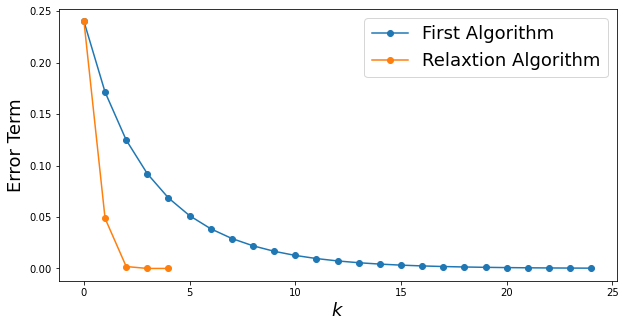

24 0.0002772486313638023
4 5.909273070869858e-12


In [19]:
# solution
xstar = 2**(1/3)

# parameters
x0 = 1.5
eps = 1e-4
K = 30

# run the initial algorithm
k, x = Algo(g,x0,eps,K)

# run the relaxed algorithm
alpha = 3*(xstar**2)/20 - 1
k_rel, x_rel = RelaxedAlgo(g,alpha,x0,eps,K)

## errors
err =  np.abs(x-xstar)
err_rel =  np.abs(x_rel-xstar)

## plot e_{k+1} versus k
tabk = np.arange(0,k+1)
tabk_rel = np.arange(0,k_rel+1)
fig = plt.figure(figsize=(10, 5))
plt.plot(tabk,err, 'o-', label='First Algorithm') #plot
plt.plot(tabk_rel,err_rel, 'o-', label='Relaxtion Algorithm') #plot
plt.legend(loc='upper right', fontsize=18)
plt.xlabel('$k$', fontsize=18)
plt.ylabel('Error Term', fontsize=18)
plt.show()

print(k, err[k])
print(k_rel, err_rel[k_rel])

<div  markdown=1 class="DoIt"> 
Compare the convergence of the two algorithms: speed of convergence, number of iterations obtained for the same value of epsilon, error for the last computed approximation. (print some of the computed results if needed)

<div  markdown=1 class="Answer"> 

From the graph we can clearly tell that the Relaxtion Algorithm converges faster than the previous algorithm. Furthermore, we have:

- For the first algorithm, the number of iterations is $k_{end}=24$ and error is about 2.7e-4

- For the Relaxtion algorithm, the number of iterations is $k_{end}=4$ and error is about 5.9e-12

<div  markdown=1 class="DoIt"> Complete the next cell to estimate the order of convergence of the relaxed algorithm.

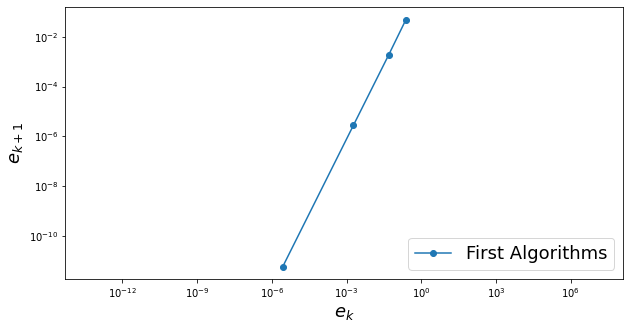

approximated order of convergence =  2.0031212507500142


In [20]:
# parameters
xstar = 2**(1/3)
x0 = 1.5
eps = 1e-4
K = 30

k, x = RelaxedAlgo(g,alpha,x0,eps,K)

## vector e_{k} = |x_k-x^*|
err = np.abs(x-xstar)

## vectors e_{k} and  e_{k+1}
X = err[:-1]     # X[k]=e_{k},   k=0...kend-1
Y = err[1:]     # Y[k]=e_{k+1}, k=0...kend-1

## plot e_{k+1} versus e_{k} in loglog-scale
fig = plt.figure(figsize=(10, 5))
plt.loglog(X, Y, marker='o', label='Relaxtion Algorithms') #plot, log-log scale
plt.legend(loc='lower right', fontsize=18)
plt.axis('equal')
plt.xlabel('$e_{k}$', fontsize=18)
plt.ylabel('$e_{k+1}$', fontsize=18)
plt.show()

## estimate the slope of the line using polyfit
slope = np.polyfit(np.log(X), np.log(Y), 1)[0]
print("approximated order of convergence = ", slope)


<div  markdown=1 class="DoIt">

Does this test confirm the expected order of convergence?

<div  markdown=1 class="Answer"> 

Yes, since we can find that the order of convergence in this test is 2.003 which is really close to 2, therefore we can say that the order of convergence is 2 and the test comfirm the expected order of convergence.

## Approximated relaxation method

Sometimes, the derivative of the function is not explicit or its derivative is not known.

In that case, the relaxation method can be modified by estimating the derivative using a finite difference approximation:

Find $a,b$ such that $a\approx x^*$, $b\approx x^*$ and chose
$$
\alpha = - \frac{g(b)-g(a)}{b-a}
$$

<div  markdown=1 class="DoIt">

 How could $a$ and $b$ be chosen?

<div  markdown=1 class="Answer"> 

Since we have $a\approx x^*$ and $b\approx x^*$, therefore we can just run the first algorithm fixed point algorithms to find the $x^*$ solution. Then we can assume a small $\lambda$ that $a=x^{*} - \lambda$ and $b=x^{*} + \lambda$

<div  markdown=1 class="DoIt"> Test this method in the following cell. 

- For the sake of simplicity, and since for this academic example $x^*$ is known, choose $a=x^* - \eta$ and $b = x^* + \eta$ for $\eta= 5.10^{-1}$.

- Plot on the same figure the error versus $k$ for the initial algorithm, the relaxed method and the approximated relaxed method. Use a log-scale for the error (y-axis).

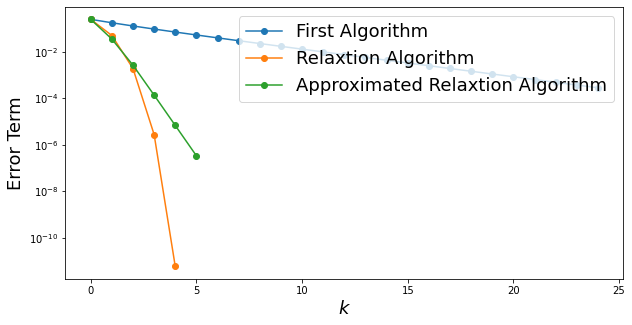

24 0.0002772486313638023
4 5.909273070869858e-12
5 3.3401929910858996e-07


In [23]:
# solution
xstar = 2**(1/3)

# parameters
x0 = 1.5
eps = 1e-4
K = 30
eta = 0.5

# run the initial algorithm
k, x = Algo(g,x0,eps,K)

# run the relaxed algorithm
alpha = 3*(xstar**2)/20 - 1
k_rel, x_rel = RelaxedAlgo(g,alpha,x0,eps,K)

# run the approximated relaxed algorithm
alpha2 = -(g(xstar+eta)-g(xstar-eta))/(2*eta)
k_rel2, x_rel2 = RelaxedAlgo(g,alpha2,x0,eps,K)

## errors
err =  np.abs(x-xstar)
err_rel =  np.abs(x_rel-xstar)
err_rel2 =  np.abs(x_rel2-xstar)

## plot e_{k+1} versus k
tabk = np.arange(0,k+1)
tabk_rel = np.arange(0,k_rel+1)
tabk_rel2 = np.arange(0,k_rel2+1)
fig = plt.figure(figsize=(10, 5))
plt.plot(tabk,err, 'o-', label='First Algorithm') #plot
plt.plot(tabk_rel,err_rel, 'o-', label='Relaxtion Algorithm') #plot
plt.plot(tabk_rel2,err_rel2, 'o-', label='Approximated Relaxtion Algorithm') #plot
plt.legend(loc='upper right', fontsize=18)
plt.yscale('log')
plt.xlabel('$k$', fontsize=18)
plt.ylabel('Error Term', fontsize=18)
plt.show()

print(k, err[k])
print(k_rel, err_rel[k_rel])
print(k_rel2, err_rel2[k_rel2])

<div  markdown=1 class="DoIt"> Comment on the results.

<div  markdown=1 class="Answer"> 

We can find that the Approximated Relation Algorithm converges slower that the Relaxed Algorithm but faster than the initial algorithm. Therefore the fixed point relaxtion algorithm is the best one in these three.

<div  markdown=1 class="DoIt"> Complete the next cell to estimate the order of convergence of the approximated relaxed algorithm.

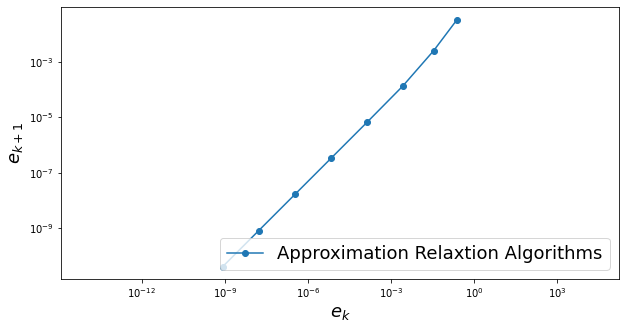

approximated order of convergence =  1.037897035424116


In [25]:
# parameters
xstar = 2**(1/3)
x0 = 1.5
eps = 1e-8
K = 30
eta = 5e-1

alpha2 = -(g(xstar+eta)-g(xstar-eta))/(2*eta)
k, x = RelaxedAlgo(g,alpha2,x0,eps,K)

## vector e_{k} = |x_k-x^*|
err = np.abs(x-xstar)

## vectors e_{k} and  e_{k+1}
X = err[:-1]     # X[k]=e_{k},   k=0...kend-1
Y = err[1:]     # Y[k]=e_{k+1}, k=0...kend-1

## plot e_{k+1} versus e_{k} in loglog-scale
fig = plt.figure(figsize=(10, 5))
plt.loglog(X, Y, marker='o', label='Approximation Relaxtion Algorithms') #plot, log-log scale
plt.legend(loc='lower right', fontsize=18)
plt.axis('equal')
plt.xlabel('$e_{k}$', fontsize=18)
plt.ylabel('$e_{k+1}$', fontsize=18)
plt.show()

## estimate the slope of the line using polyfit
slope = np.polyfit(np.log(X), np.log(Y), 1)[0]
print("approximated order of convergence = ", slope)

<div  markdown=1 class="DoIt">

Does this test confirm the expected order of convergence?

<div  markdown=1 class="Answer"> 

Yes, since we can find that the order of convergence in this test is 1.037 which is really close to 1, therefore we can say that the order of convergence is 1 and the test comfirm the expected order of convergence. And also it's approved the intial assuption of the algorithm.

<div  markdown=1 class="DoIt">

Complete the following cell to plot on the same graph $e_{k+1}$ versus $e_k$ in a log-log scale for the three methods.

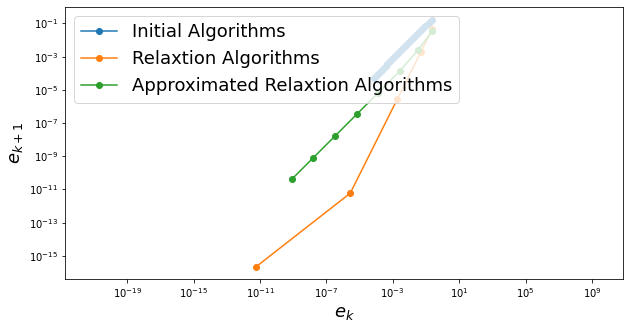

In [27]:
# solution
xstar = 2**(1/3)
x0 = 1.5
eps = 1e-8
K = 30
eta = 5e-1

#compute iterations, initial algorithm
k1, x1 = Algo(g,x0,eps,K)

#compute iterations, relaxed algorithm
alpha2 = 3*(xstar**2)/20 - 1
k2, x2 = RelaxedAlgo(g,alpha2,x0,eps,K)

#compute iterations, approximated relaxed algorithm
alpha3 = -(g(xstar+eta)-g(xstar-eta))/(2*eta)
k3, x3 = RelaxedAlgo(g,alpha3,x0,eps,K)

## vector e_{k} = |x_k-x^*|
err1 = np.abs(x1-xstar)
err2 = np.abs(x2-xstar)
err3 = np.abs(x3-xstar)

## vectors e_{k} and  e_{k+1}
X1, Y1 = err1[:-1], err1[1:]
X2, Y2 = err2[:-1], err2[1:]
X3, Y3 = err3[:-1], err3[1:]

## plot e_{k+1} versus e_{k} in loglog-scale
fig = plt.figure(figsize=(10, 5))
plt.loglog(X1, Y1, marker='o', label='Initial Algorithms') #plot, log-log scale
plt.loglog(X2, Y2, marker='o', label='Relaxtion Algorithms') #plot, log-log scale
plt.loglog(X3, Y3, marker='o', label='Approximated Relaxtion Algorithms') #plot, log-log scale
plt.legend(loc='upper left', fontsize=18)
plt.axis('equal')
plt.xlabel('$e_{k}$', fontsize=18)
plt.ylabel('$e_{k+1}$', fontsize=18)
plt.show()


<div  markdown=1 class="DoIt">

Comment the results. In particular, how do the behavior of the initial and the approximated relaxed algorithm converge? Can you explain why?

<div  markdown=1 class="Answer"> 

We can see from the graph, in the log-log scale we find that the initial algorithm and approximated relaxed algorithm have the order of convergence in 1 and the relaxtion algorithms have 2 in order of convergence.

<div  markdown=1 class="DoIt">

Look at the code and run the following cell.

k=0, alpha = -0.7118898422047701
k= 1 alpha = -0.7118898422047701
k= 2 alpha = -0.7118898422047701
k= 3 alpha = -0.7118898422047701
k= 4 alpha = -0.7118898422047701
k= 5 alpha = -0.7629841353111826
k= 6 alpha = -0.7629841353111826
k= 7 alpha = -0.7629841353111826
k= 8 alpha = -0.7629841353111826


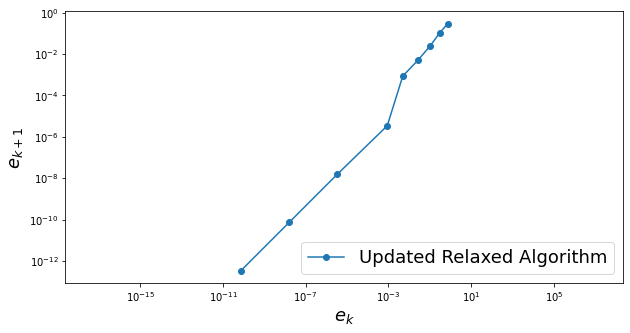

In [28]:
## New algorithm for function g
## input : g = name of the function
##         alpha = initial relaxation parameter
##         x0 = initialization
##         Niter = number of iterations between updates of alpha
##         K = number of iterations
## output : x = sequence generated using the fixed point iteration for g (x[k]=x_k)
def NewAlgo(g,alpha,x0,eps,K,Niter):
    x = np.zeros(K+1)
    x[0] = x0 
    print('k=0, alpha =',alpha)
    x[1] = (g(x0) + alpha * x0) / (alpha +1)
    k = 1
    while abs(x[k]-x[k-1])>eps and k < K:
        i = 0
        while i < Niter and k < K:
            print('k=',k,'alpha =',alpha)
            x[k+1] = (g(x[k]) + alpha * x[k]) / (alpha +1)
            k = k+1
            i = i+1
        alpha = -(g(x[k])-g(x[k-1]))/(x[k]-x[k-1])
    return (k, x[:k+1])


########################
########################
xstar = 2**(1/3)
x0 = 2
eps = 1e-8
K = 30
eta = 1
alpha = -(g(xstar+eta)-g(xstar-eta))/(2*eta)
Niter = 4
k, x = NewAlgo(g,alpha,x0,eps,K,Niter)

## vector e_{k} = |x_k-x^*|
err = abs(x-xstar)

## vectors e_{k} and  e_{k+1}
X = err[:-1]    # X[k]=e_{k},   k=0...kend-1
Y = err[1:]     # Y[k]=e_{k+1}, k=0...kend-1

## plot e_{k+1} versus e_{k} in loglog-scale
fig = plt.figure(figsize=(10, 5))
plt.loglog(X, Y, marker="o", label='Updated Relaxed Algorithm') #log-log scale
plt.legend(loc='lower right', fontsize=18)
plt.axis('equal')
plt.xlabel('$e_k$', fontsize=18)
plt.ylabel('$e_{k+1}$', fontsize=18)
plt.show()


<div  markdown=1 class="DoIt">

Can you explain the resulting plot?

<div  markdown=1 class="Answer"> 

The algorithm above is a modified version of the approximated relaxation method, where the value of $\alpha$ is regularly updated. Every $N_{iter}$ iterations, since $x_k$ is closer to $x^*$, $\alpha$ gets closer to $-g'(x^*)$. Hence the constant $C$ in the convergence speed gets closer to zero.

Here, $\alpha$ is updated at step 5. As a consequence, one can observe 2 consecutive lines with slope 1 and the intercept decreasing inbetween.

In [ ]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom3.css").read()
    return HTML(styles)
css_styling()